In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [ ]:
consumerKey = "u8fZJFZm8MBtSdwKEPd6e2LEy"
consumerSecret = "Cl2zQSs1odpBDAHXzPjckRXIP7MipGDfJ5mtlQtoKSoqM2Zjj2"
accessToken = "2915840287-m8x7qiZysU3C9Waq69RV9thBJfsg9qa2Gy3sS1p"
accessTokenSecret = "a4WCjY9QvYsXaMaK7WpECLtggkcK0U8JdtPCJO3HGphi5"

In [ ]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
posts = api.user_timeline(screen_name = "ElonMusk", count = 100, lang = "en", tweet_mode = "extended")
print("show the five recent tweets:\n")
i = 1;
for tweet in posts[0:5]:
  print(str(i)+") "+tweet.full_text+"\n")
  i+=1

show the five recent tweets:

1) @AstroJordy @flcnhvy @DJSnM Boring Co tunnel in Vegas is only a few months from being operational

2) @flcnhvy @DJSnM Neuralink this month &amp; Tesla next month, SpaceX probably October. We will have made a lot of progress by then. Might have a prototype booster hop done by then.

3) @zeitmas @DJSnM Soon

4) @DJSnM They’re quite accurate!

5) @EvaFoxU That number sure comes up a lot 🤣🤣



In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ["Tweets"])
df.head()

,Tweets
0,@AstroJordy @flcnhvy @DJSnM Boring Co tunnel i...
1,@flcnhvy @DJSnM Neuralink this month &amp; Tes...
2,@zeitmas @DJSnM Soon
3,@DJSnM They’re quite accurate!
4,@EvaFoxU That number sure comes up a lot 🤣🤣


In [ ]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s+]', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df



,Tweets
0,Boring Co tunnel in Vegas is only a few mon...
1,"Neuralink this month &amp; Tesla next month,..."
2,Soon
3,They’re quite accurate!
4,That number sure comes up a lot 🤣🤣
...,...
95,Ms Tree catches fairing in her net
96,😐
97,: Falcon 9’s first stage has landed on the Of ...
98,"Up there somewhere, cruising through deep sp..."


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Boring Co tunnel in Vegas is only a few mon...,0.700000,-0.400000
1,"Neuralink this month &amp; Tesla next month,...",0.000000,0.000000
2,Soon,0.000000,0.000000
3,They’re quite accurate!,0.633333,0.500000
4,That number sure comes up a lot 🤣🤣,0.888889,0.500000
...,...,...,...
95,Ms Tree catches fairing in her net,0.000000,0.000000
96,😐,0.000000,0.000000
97,: Falcon 9’s first stage has landed on the Of ...,0.422222,0.333333
98,"Up there somewhere, cruising through deep sp...",0.400000,0.000000


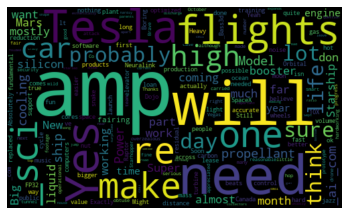

In [ ]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,Boring Co tunnel in Vegas is only a few mon...,0.700000,-0.400000,Negative
1,"Neuralink this month &amp; Tesla next month,...",0.000000,0.000000,Neutral
2,Soon,0.000000,0.000000,Neutral
3,They’re quite accurate!,0.633333,0.500000,Positive
4,That number sure comes up a lot 🤣🤣,0.888889,0.500000,Positive
...,...,...,...,...
95,Ms Tree catches fairing in her net,0.000000,0.000000,Neutral
96,😐,0.000000,0.000000,Neutral
97,: Falcon 9’s first stage has landed on the Of ...,0.422222,0.333333,Positive
98,"Up there somewhere, cruising through deep sp...",0.400000,0.000000,Neutral


In [ ]:
j=1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+")"+sortedDF['Tweets'][i])
    j+=1

1) They’re quite accurate!
2) That number sure comes up a lot 🤣🤣
3)  I’m fine with reasonable drone footage. Just needs to be at a fair distance &amp; not coming right up to people. I think our security was a little overzealous in this case.
4)  Thanks to a smart and hardworking team at Tesla. These sure are wild times …
5)  Brave Starhopper carried the day
6) Only so many days  
7) We were too obtuse for our own good, although I think it works esthetically. Those are folded-over current collectors at the top/bottom of the cell, which are important, but I don’t want to jump the gun on Sept 22 …
8)The Big Bang started very, very smōl  
9)Should we believe things proportionate to the evidence that they are true? (yes)
10)  Was just there &amp; weather was calm. Sure hope it stays that way!
11) Exactly
12)  No, we’re focused on developing new products &amp; scaling production
13)  Yes, will show V2. Still far from LASIK, but could get pretty close in a few years.
14)Live webcast of workin

In [ ]:
j=1
sortedDF = df.sort_values(by = [ 'Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+")"+sortedDF['Tweets'][i])
    j+=1

1)   Boring Co tunnel in Vegas is only a few months from being operational
2) Much appreciated. This was a serious attack.
3) But actually nothing. Was surprised to hear they’re across the road. Adding silicon to carbon anode makes sense. We already do. Question is just what ratio of silicon to carbon &amp; what shape? Silicon expands like crazy during discharge &amp; comes apart, so cycle life is usually bad.
4) Then they leave the house and hardly ever call their parents!
5)  Very different computers are needed for training vs inference. FSD is mostly Int8, but Dojo is de facto FP32 (feels like FP32, but actually FP16 with boring bits truncated) so we don’t need to rewrite all the training software. It should work almost immediately.
6)_addicted  No &amp; not possible at this scale
7)    Starship/Super Heavy is ~10X bigger in mass &amp; volume
8) It’s quite hard for us to write the software needed to cover basic car functionality, but maybe we could do something of this nature
9)  No